In [1]:
# Volatility calculation for a list of Index

In [2]:
#!pip install ipywidgets

In [3]:
import pandas as pd
from scipy.stats import skew, kurtosis
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

tickers = ["^SPX", "^IXIC", "^DJI", "^VIX","^RUT","CL=F","GC=F","AAPL"] # Stock to be added to the list
results = []

for ticker in tickers:
    data = yf.download(ticker, start="2023-05-19", end="2023-08-19", interval="1d")
    returns = data['Close'].pct_change().dropna()
    drawdown = returns - returns.cummax()

    # Compute the risk measures
    measures = {
        'Ticker': ticker,
        'Standard Deviation': returns.std(),
        'Mean Absolute Deviation': returns.mad(),
        'Semi Standard Deviation': returns[returns < 0].std(),
        'First Lower Partial Moment': returns[returns < 0].mean(),
        'Second Lower Partial Moment': returns[returns < 0].apply(lambda x: x**2).mean(),
        'Value at Risk': returns.quantile(0.05),
        'Conditional Value at Risk': returns[returns <= returns.quantile(0.05)].mean(),
        'Skewness': skew(returns),
        'Kurtosis': kurtosis(returns),
        'Ulcer Index': (drawdown**2).mean()**0.5,
        'Average Drawdown': drawdown.mean(),
        'Max Drawdown': drawdown.min(),
        'Tail Gini of Losses': sum(sorted(returns)[:int(len(returns) * 0.05)]) / sum(sorted(returns)),
    }

    # Entropic Value at Risk
    alpha = 0.05
    sorted_returns = sorted(returns)
    threshold_index = int(alpha * len(sorted_returns))
    threshold = sorted_returns[threshold_index]
    tail_mean = sum(sorted_returns[:threshold_index]) / threshold_index
    measures['Entropic Value at Risk'] = threshold + (1 / (1 - alpha)) * tail_mean

    # Add the results to a list
    results.append(measures)

# Create a DataFrame from the results
measures_df = pd.DataFrame(results)

# Set the index to 'Ticker' column and transpose the DataFrame
measures_df.set_index('Ticker', inplace=True)
transposed_measures_df = measures_df.transpose()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
transposed_measures_df

Ticker,^SPX,^IXIC,^DJI,^VIX,^RUT,CL=F,GC=F,AAPL
Standard Deviation,0.006716,0.009773,0.006269,0.052893,0.010963,0.020013,0.005985,0.011079
Mean Absolute Deviation,0.005467,0.007825,0.004909,0.040667,0.009066,0.016872,0.004449,0.008173
Semi Standard Deviation,0.003501,0.005723,0.002911,0.029941,0.004303,0.011431,0.004109,0.008649
First Lower Partial Moment,-0.005082,-0.007234,-0.005074,-0.037570,-0.008225,-0.018587,-0.004684,-0.008174
Second Lower Partial Moment,0.000038,0.000084,0.000034,0.002280,0.000086,0.000471,0.000038,0.000139
Value at Risk,-0.007912,-0.012593,-0.008336,-0.074555,-0.013201,-0.033279,-0.011689,-0.015125
Conditional Value at Risk,-0.011134,-0.016950,-0.009764,-0.091994,-0.014418,-0.040760,-0.012924,-0.023980
Skewness,0.103460,-0.021508,0.534225,0.333522,0.622971,-0.446769,-0.072738,-1.049355
Kurtosis,-0.718170,-0.484576,0.559207,0.291950,0.220097,-0.581771,0.174488,4.124792
Ulcer Index,0.014658,0.022502,0.020067,0.112570,0.034387,0.035633,0.012993,0.022928


In [5]:
from IPython.display import display
import ipywidgets as widgets
# Create a function to display the DataFrame based on the sorted column
def display_table(sort_by):
    sorted_df = transposed_measures_df.sort_values(by=sort_by)
    display(sorted_df)
# Create a dropdown widget with columns to sort by
dropdown = widgets.Dropdown(
    options=transposed_measures_df.columns,
    description='Sort by:',
    disabled=False,
)
print("___________________RISK MEASURES OF THE INDICES WITH RESPECT TO THE TICKER_____________________________")
# Create a widget to interact with the dropdown
widgets.interactive(display_table, sort_by=dropdown)

                                      RISK MEASURES OF THE INDICES WITH RESPECT TO THE TICKER


interactive(children=(Dropdown(description='Sort by:', options=('^SPX', '^IXIC', '^DJI', '^VIX', '^RUT', 'CL=F…

In [6]:
# Sort the correlation matrix by a specific column Sum
sorted_correlation = transposed_measures_df.corr().abs()
sorted_correlation["Sum"]=sorted_correlation.sum()
sorted_correlation.sort_values(by='Sum', ascending=True)

Ticker,^SPX,^IXIC,^DJI,^VIX,^RUT,CL=F,GC=F,AAPL,Sum
Ticker,,,,,,,,,
^DJI,0.366224,0.553263,1.000000,0.896403,0.958502,0.255968,0.726835,0.804303,5.561498
CL=F,0.858721,0.913531,0.255968,0.655045,0.345366,1.000000,0.817190,0.771363,5.617184
^SPX,1.000000,0.950104,0.366224,0.664821,0.560287,0.858721,0.866292,0.741801,6.008251
^RUT,0.560287,0.673231,0.958502,0.900821,1.000000,0.345366,0.801786,0.817856,6.057849
^IXIC,0.950104,1.000000,0.553263,0.840868,0.673231,0.913531,0.966524,0.906734,6.804256
^VIX,0.664821,0.840868,0.896403,1.000000,0.900821,0.655045,0.929188,0.974925,6.862071
AAPL,0.741801,0.906734,0.804303,0.974925,0.817856,0.771363,0.973783,1.000000,6.990766
GC=F,0.866292,0.966524,0.726835,0.929188,0.801786,0.817190,1.000000,0.973783,7.081598


In [7]:
# Covariance of the risk measures and sorting Sum
sorted_covariance = transposed_measures_df.cov().abs()
sorted_covariance["sum"]=sorted_covariance.sum()
sorted_covariance.sort_values(by='sum', ascending=True)

Ticker,^SPX,^IXIC,^DJI,^VIX,^RUT,CL=F,GC=F,AAPL,sum
Ticker,,,,,,,,,
^SPX,0.083885,0.082953,0.035711,0.137175,0.049431,0.071853,0.058693,79.631916,80.151617
CL=F,0.071853,0.079560,0.024897,0.134819,0.030393,0.083465,0.055228,82.597849,83.078065
GC=F,0.058693,0.068157,0.057244,0.154850,0.057132,0.055228,0.054722,84.430662,84.936689
^RUT,0.049431,0.061820,0.098299,0.195483,0.092787,0.030393,0.057132,92.337335,92.922680
^DJI,0.035711,0.056152,0.113351,0.215002,0.098299,0.024897,0.057244,100.366711,100.967367
^IXIC,0.082953,0.090874,0.056152,0.180582,0.061820,0.079560,0.068157,101.310981,101.931079
^VIX,0.137175,0.180582,0.215002,0.507521,0.195483,0.134819,0.154850,257.427633,258.953064
AAPL,79.631916,101.310981,100.366711,257.427633,92.337335,82.597849,84.430662,137377.070487,138175.173574


In [8]:
# The factor which is affecting the given stock volalitity is ????

In [9]:
# Filter for P values
import pandas as pd
from scipy.stats import t

# Step 2: Calculate the correlation coefficients for risk measures
correlation_matrix = transposed_measures_df.corr()
h= 0.40
# Filter values less than h using boolean indexing
filtered_matrix1 = correlation_matrix[correlation_matrix > - h]
filtered_matrix = filtered_matrix1[filtered_matrix1 < h ]

# Step 3: Set up the hypothesis
# Null hypothesis (H0): there is no significant correlation between the features
# Alternative hypothesis (H1): there is a significant correlation between the features

# Step 4: Perform the correlation test
p_values = []
for stock1 in filtered_matrix.columns:
    for stock2 in filtered_matrix.index:
        if stock1 != stock2:
            corr = filtered_matrix.loc[stock1, stock2]
            n = returns.shape[0]  # number of data points
            df = n - 2  # degrees of freedom for Student's t-distribution
            t_stat = corr * ((n - 2) / (1 - corr**2))**0.5  # calculate t-statistic
            p_value = 2 * (1 - t.cdf(abs(t_stat), df))  # two-tailed p-value
            p_values.append(p_value)

# Perform multiple comparison correction if needed (e.g., Bonferroni correction)

# Print the p-values
stocks=[]
for i in range(len(filtered_matrix.columns)):
    for j in range(i + 1, len(filtered_matrix.columns)):
        stock1 = filtered_matrix.columns[i]
        stock2 = filtered_matrix.columns[j]
        p_value = p_values.pop(0)
        if p_value <=  0.05:
            print(f"P-value for correlation between {stock1} and {stock2}: {p_value}")
            stocks.append(stock1)
            stocks.append(stock2) 

P-value for correlation between ^SPX and ^DJI: 0.003418005952675607
P-value for correlation between ^DJI and ^RUT: 0.003418005952675607
P-value for correlation between ^VIX and ^RUT: 0.04463634114859727


In [10]:
# Example of removing duplicates from a list
my_list= stocks
# Convert the list to a set to remove duplicates
unique_set = set(my_list)
# Convert the set back to a list
unique_list = list(unique_set)
# Sort the list alphabetically
unique_list.sort()
print(unique_list)

['^DJI', '^RUT', '^SPX', '^VIX']


In [11]:
# Tickers of assets
tickers1 =unique_list
tickers1.sort()

In [22]:
tickers1

['^DJI', '^RUT', '^SPX', '^VIX']

In [12]:
!pip install riskfolio
import riskfolio as rp

ERROR: Could not find a version that satisfies the requirement riskfolio (from versions: none)
ERROR: No matching distribution found for riskfolio


In [23]:
# Downloading the data
data = yf.download(tickers1, period="3mo")
data = data.loc[:,('Adj Close', slice(None))]
data.columns = tickers1
assets = data.pct_change().dropna()

Y = assets

# Creating the Portfolio Object
port = rp.Portfolio(returns=Y)

# To display dataframes values in percentage format
pd.options.display.float_format = '{:.4%}'.format

# Choose the risk measure
rm = 'MSV'  # Semi Standard Deviation

# Estimate inputs of the model (historical estimates)
method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate the portfolio that maximizes the risk adjusted return ratio
w1 = port.optimization(model='Classic', rm=rm, obj='Sharpe', rf=0.0, l=0, hist=True)

# Estimate points in the efficient frontier mean - semi standard deviation
ws = port.efficient_frontier(model='Classic', rm=rm, points=20, rf=0, hist=True)

# Estimate the risk parity portfolio for semi standard deviation
w2 = port.rp_optimization(model='Classic', rm=rm, rf=0, b=None, hist=True)

[*********************100%***********************]  4 of 4 completed


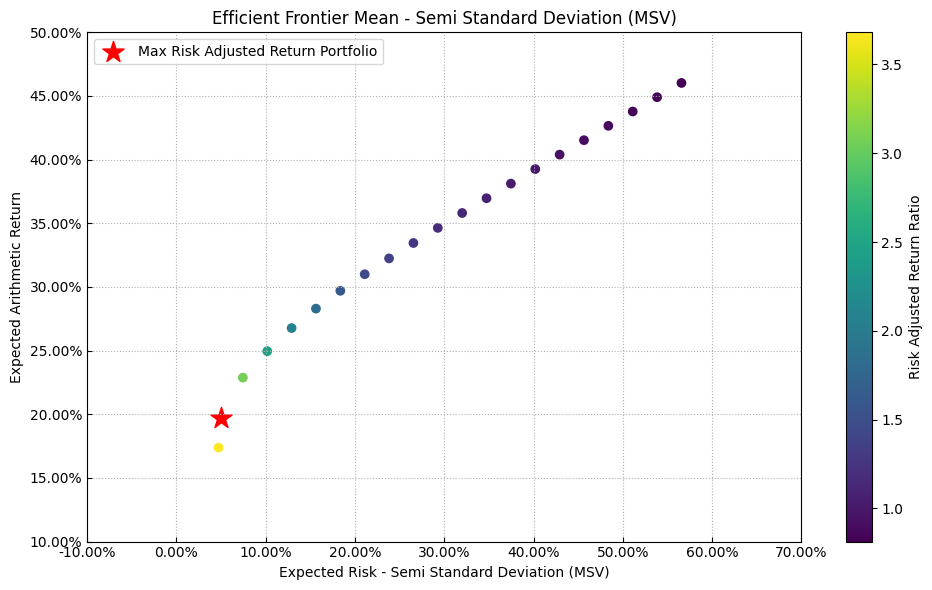

In [24]:
label = 'Max Risk Adjusted Return Portfolio'
mu = port.mu
cov = port.cov
returns = port.returns

ax = rp.plot_frontier(w_frontier=ws, mu=mu, cov=cov, returns=returns,
                       rm=rm, rf=0, alpha=0.05, cmap='viridis', w=w1,
                       label=label, marker='*', s=16, c='r',
                       height=6, width=10, t_factor=252, ax=None)

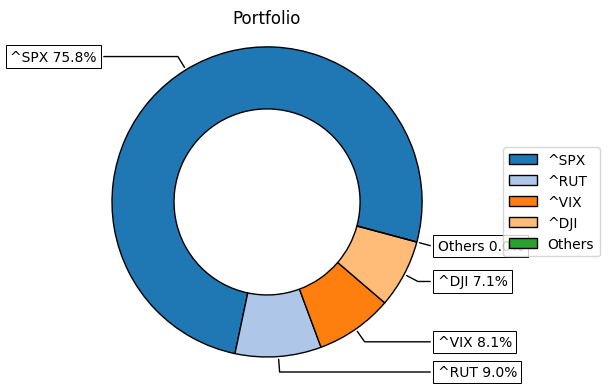

In [28]:
ax = rp.plot_pie(w=w1, title='Portfolio', height=4, width=6, cmap="tab20", ax=None)

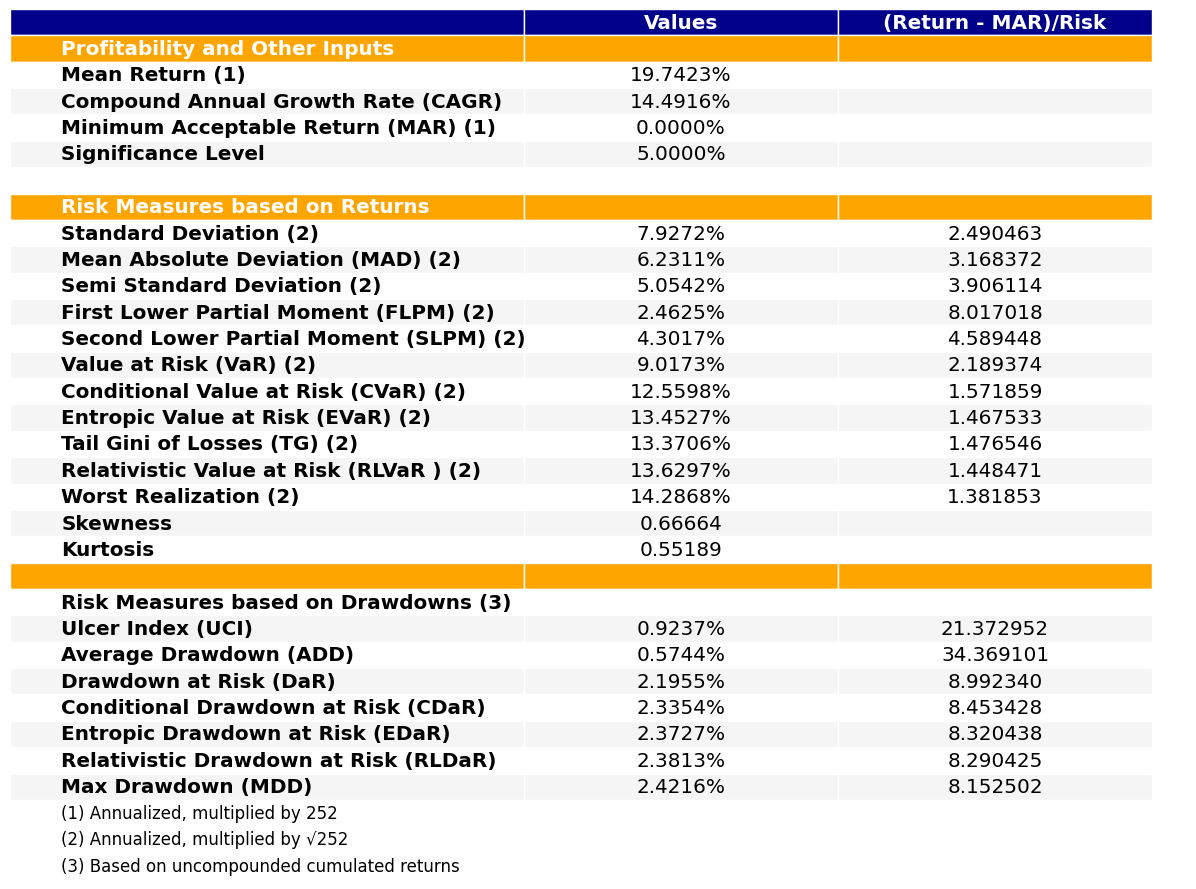

In [26]:
ax = rp.plot_table(returns=Y, w=w1, MAR=0, alpha=0.05, ax=None)